## Business Problem
### -Company collected data from 5000 customers. The objective of this case study is to understand what's driving the total spend of credit card(Primary Card + Secondary card)
###  Given the factors, predict credit limit for the new applicants
### -Priotize the drivers based on the importance.

In [1]:
#Importing Packages
import numpy as np
import pandas as pd
import pandas_profiling

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.backends.backend_pdf import PdfPages
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing data
data=pd.read_excel("Data Set.xlsx")

In [3]:
#These will help you to see all records as well as columns in the data set
pd.set_option('display.max_rows',5)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)
data

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,cardspent,card2spent,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,1,0,1,0,31,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,1,0,14.3,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,81.66,67.80,0,3,5,1,6.50,1.871802,34.40,3.538057,1,29.0,3.367296,161.05,5.081715,1,29.50,3.384390,126.10,4.837075,1,14.25,2.656757,60.0,4.094345,0,0.00,NaN,0.00,NaN,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,0,0,1,0,15,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1,-1,2,6,0,0,0,0,0,0,6,1,3,2,1,2,1,1,6.8,1,0,0,1,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,42.60,34.94,1,1,39,0,8.90,2.186051,330.60,5.800909,0,0.0,NaN,0.00,NaN,1,54.85,4.004602,1975.00,7.588324,1,16.00,2.772589,610.0,6.413459,1,45.65,3.821004,1683.55,7.42866,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4998,9325-URAAUT-7FA,1,1.0,0,47,4,December,19,4,2,0,3,2,0,189,5.241747,5,10.8,5.021352,1.613699,15.390648,2.733760,1,4,1,15,3,4,0,0,0,0,0,0,0,0,1,1,16,4,2,1,1,96.0,3,1,1,1,1,12.0,1,0,0,0,1,0,0,0,0,0,9,2,1,1,0,3,1,1,0,22,5,4,3,1,0,15,4,381.35,371.60,0,3,37,0,7.95,2.073172,282.70,5.644386,0,0.0,NaN,0.00,NaN,1,29.55,3.386084,1032.85,6.940077,1,9.50,2.251292,345.0,5.843544,0,0.00,NaN,0.00,NaN,1,0,0,3,0,0,0,0,1,1,24,1,1,1,0,1,1,1,0,1,0,0,0
4999,8027-EXDZBF-OGR,3,5.0,1,41,4,May,10,1,5,0,20,5,0,77,4.343805,4,6.2,2.267650,0.818744,2.506350,0.918828,0,4,1,12,2,2,9,0,0,0,0,4,0,5,1,1,15,3,2,1,0,49.3,3,0,1,4,3,32.0,1,0,0,1,1,0,0,1,0,0,9,2,1,1,1,3,3,3,0,16,5,4,1,3,0,8,3,269.72,138.14,1,3,25,1,8.05,2.085672,197.25,5.284472,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.00,NaN,1,11.50,2.442347,260.0,5.560682,0,0.00,NaN,0.00,NaN,0,0,0,0,0,0,0,0,0,1,19,1,1,1,0,0,0,0,0,0,0,0,0


##  Data Preparation Level 1
### PRE MODELLING
### Data Analysis

In [4]:
#Checking Missing values
sum(data.isnull().sum())

22003

In [5]:
#Checking column  and their data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 130 entries, custid to response_03
dtypes: float64(31), int64(97), object(2)
memory usage: 5.0+ MB


In [6]:
#Checking Data Dimension
data.shape

(5000, 130)

In [7]:
#Printing all columns in data set
data.columns

Index(['custid', 'region', 'townsize', 'gender', 'age', 'agecat', 'birthmonth', 'ed', 'edcat', 'jobcat',
       ...
       'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news', 'response_01', 'response_02', 'response_03'], dtype='object', length=130)

In [8]:
data.isnull().sum() # Finding no. of missing values in each column

custid         0
region         0
              ..
response_02    0
response_03    0
Length: 130, dtype: int64

In [9]:
data.duplicated().value_counts()

False    5000
dtype: int64

### Creating Dependent Y column

In [10]:
#According to our given problem we have to add cardspent and card2spent
data['total_spent']=data['cardspent']+data['card2spent']

In [11]:
del data['cardspent']
del data['card2spent']

In [12]:
data.shape

(5000, 129)

### Pandas_Profiling
#### Provides you with a Audit Report For Exploratory Data Analysis

In [13]:
import pandas_profiling

In [14]:
profile_report=pandas_profiling.ProfileReport(data)

In [15]:
profile_report.to_file("profile_report.html")

### Dropping the variables based on the data audit report (near zero variance, higly correlated variables)

In [14]:
data.drop(['addresscat','agecat','card2tenurecat','cardtenure','cardtenurecat','commutecat','edcat','equipmon',
           'lncardmon','lnequipmon','lninc','lnlongten','lntollten','lnwireten','longten','spoused','spousedcat',
            'tenure','tollmon','wiremon'], axis=1, inplace=True)

### Dropping the variables having missing values greater than 25%

In [15]:
data.drop(['custid','lncardten','lnequipten','lntollmon','lnwiremon'],axis=1,inplace=True)

In [16]:
data.head()

,region,townsize,gender,age,birthmonth,ed,jobcat,union,employ,empcat,retire,income,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,card2,card2type,card2benefit,card2fee,card2tenure,active,bfast,churn,longmon,lnlongmon,tollfree,tollten,equip,equipten,callcard,cardmon,cardten,wireless,wireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,total_spent
0,1,2.0,1,20,September,15,1,1,0,1,0,31,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,3,0,0,0,0,0,0,0,0,0,2,0,2,1,0,14.3,1,0,0,8,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,5,3,1,0,3,0,3,1,6.50,1.871802,1,161.05,1,126.1,1,14.25,60.0,0,0.00,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0,149.46
1,5,5.0,0,22,May,17,2,0,0,1,0,15,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,2,6,0,0,0,0,0,0,6,1,3,2,2,1,1,6.8,1,0,0,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,1,3,0,4,1,1,0,8.90,2.186051,0,0.00,1,1975.0,1,16.00,610.0,1,1683.55,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0,77.54
2,3,4.0,1,67,June,14,2,0,16,5,0,35,2,9.9,0.928620,-0.074056,2.536380,0.930738,0,4,1,3,3,2,1,0,0,0,0,0,1,1,30,3,1,1,18.8,1,0,1,4,24.0,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,4,1,3,0,25,0,3,0,28.40,3.346389,0,0.00,0,0.0,1,23.00,1410.0,0,0.00,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0,359.97
3,4,3.0,0,23,May,16,2,0,0,1,0,20,1,5.7,0.022800,-3.780995,1.117200,0.110826,1,2,1,5,0,0,0,0,0,0,0,0,1,3,3,3,1,1,8.7,1,0,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,3,2,4,0,5,1,1,0,6.00,1.791759,0,0.00,0,0.0,1,21.00,685.0,0,0.00,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0,359.41
4,2,2.0,0,26,July,16,2,0,1,1,0,23,1,1.7,0.214659,-1.538705,0.176341,-1.735336,0,1,1,4,0,0,0,0,0,0,0,0,0,2,3,1,0,1,10.6,1,0,1,6,32.0,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,1,3,2,0,9,1,3,0,3.05,1.115142,1,387.70,0,0.0,1,17.25,360.0,1,410.80,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0,507.83


In [17]:
data.shape

(5000, 104)

### Dividing the dataset into numerical and categorical

In [18]:
# Converting catagorical variables into a list.
cat_var_names=['region','townsize','gender','birthmonth','jobcat','union','employ','empcat','retire','inccat',
          'default','jobsat','marital','homeown','hometype','cars','carown','cartype',
          'carcatvalue','carbought','carbuy','commute','commutecar','commutemotorcycle','commutecarpool',
          'commutebus','commuterail','commutepublic','commutebike','commutewalk','commutenonmotor','telecommute','reason',
          'polview','polparty','polcontrib','vote','card','cardtype','cardbenefit','cardfee',
          'card2','card2type','card2benefit','card2fee','card2tenure','active','bfast','churn','tollfree',
          'equip','callcard','wireless','multline','voice','pager','internet','callid','callwait','forward','confer','ebill',
          'owntv','ownvcr','owndvd','owncd','ownpda','ownpc','ownipod','owngame','ownfax','news','response_01','response_02',
          'response_03']


In [19]:
# Converting catagorical variables from numeric datatype
for i in cat_var_names:
    data[i]=data[i].astype('object')

In [20]:
# This will return a list
numeric_var_names = [key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]

# Find Categorical variable in Data frame
cat_var_names = [key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['object']]

#Print the data frame
print( numeric_var_names)
print("*******************************************************************************************")
print(cat_var_names)

['age', 'ed', 'income', 'debtinc', 'creddebt', 'lncreddebt', 'othdebt', 'lnothdebt', 'reside', 'pets', 'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles', 'pets_small', 'pets_saltfish', 'pets_freshfish', 'address', 'carvalue', 'commutetime', 'longmon', 'lnlongmon', 'tollten', 'equipten', 'cardmon', 'cardten', 'wireten', 'hourstv', 'total_spent']
*******************************************************************************************
['region', 'townsize', 'gender', 'birthmonth', 'jobcat', 'union', 'employ', 'empcat', 'retire', 'inccat', 'default', 'jobsat', 'marital', 'homeown', 'hometype', 'cars', 'carown', 'cartype', 'carcatvalue', 'carbought', 'carbuy', 'commute', 'commutecar', 'commutemotorcycle', 'commutecarpool', 'commutebus', 'commuterail', 'commutepublic', 'commutebike', 'commutewalk', 'commutenonmotor', 'telecommute', 'reason', 'polview', 'polparty', 'polcontrib', 'vote', 'card', 'cardtype', 'cardbenefit', 'cardfee', 'card2', 'card2type', 'card2benefit', 'card2fee', 'c

In [21]:
#Convert a list in to dataframe 
#Information about categorical variable in data
data_cat=data[cat_var_names]

In [22]:
data_cat.head()

,region,townsize,gender,birthmonth,jobcat,union,employ,empcat,retire,inccat,default,jobsat,marital,homeown,hometype,cars,carown,cartype,carcatvalue,carbought,carbuy,commute,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,card2,card2type,card2benefit,card2fee,card2tenure,active,bfast,churn,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,2,1,September,1,1,0,1,0,2,1,1,0,0,2,2,1,0,1,0,0,8,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,5,3,1,0,3,0,3,1,1,1,1,0,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,0
1,5,5,0,May,2,0,0,1,0,1,1,1,0,1,3,2,1,1,1,0,0,1,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,1,3,0,4,1,1,0,0,1,1,1,1,1,1,4,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0
2,3,4,1,June,2,0,16,5,0,2,0,4,1,1,1,3,1,1,1,0,1,4,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,4,1,3,0,25,0,3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0
3,4,3,0,May,2,0,0,1,0,1,1,2,1,1,3,3,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,3,2,4,0,5,1,1,0,0,0,1,0,1,0,0,2,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,0
4,2,2,0,July,2,0,1,1,0,1,0,1,1,0,2,1,0,1,1,0,1,6,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,1,3,2,0,9,1,3,0,1,0,1,1,0,1,0,3,1,1,1,1,0,1,1,1,1,0,1,0,1,0,0,0,1,0


In [23]:
data_cat.shape

(5000, 75)

In [24]:
#Convert a list in to dataframe 
#Information about numeric variable in data
data_num=data[numeric_var_names]

In [25]:
data_num.head()

,age,ed,income,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,address,carvalue,commutetime,longmon,lnlongmon,tollten,equipten,cardmon,cardten,wireten,hourstv,total_spent
0,20,15,31,11.1,1.200909,0.183079,2.240091,0.806516,3,0,0,0,0,0,0,0,0,0,14.3,22.0,6.50,1.871802,161.05,126.1,14.25,60.0,0.00,13,149.46
1,22,17,15,18.6,1.222020,0.200505,1.567980,0.449788,2,6,0,0,0,0,0,0,6,2,6.8,29.0,8.90,2.186051,0.00,1975.0,16.00,610.0,1683.55,18,77.54
2,67,14,35,9.9,0.928620,-0.074056,2.536380,0.930738,3,3,2,1,0,0,0,0,0,30,18.8,24.0,28.40,3.346389,0.00,0.0,23.00,1410.0,0.00,21,359.97
3,23,16,20,5.7,0.022800,-3.780995,1.117200,0.110826,5,0,0,0,0,0,0,0,0,3,8.7,38.0,6.00,1.791759,0.00,0.0,21.00,685.0,0.00,26,359.41
4,26,16,23,1.7,0.214659,-1.538705,0.176341,-1.735336,4,0,0,0,0,0,0,0,0,3,10.6,32.0,3.05,1.115142,387.70,0.0,17.25,360.0,410.80,27,507.83


In [26]:
data_num.shape

(5000, 29)

In [27]:
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=data_num.apply(lambda x: var_summary(x)).T

In [28]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
age,5000.0,0.0,235128.00,47.02560,47.00,17.770338,315.784902,18.00,18.0000,20.000,23.000,31.0000,47.00,62.0000,72.000,76.0000,79.0000,79.00
ed,5000.0,0.0,72715.00,14.54300,14.00,3.281083,10.765504,6.00,8.0000,9.000,10.000,12.0000,14.00,17.0000,19.000,20.0000,21.0000,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hourstv,5000.0,0.0,98225.00,19.64500,20.00,5.165609,26.683512,0.00,0.0000,12.000,14.000,17.0000,20.00,23.0000,26.000,28.0000,31.0000,36.00
total_spent,5000.0,0.0,2490393.15,498.07863,414.25,351.529270,123572.827720,8.11,58.1976,133.106,184.033,276.2825,414.25,615.5625,908.125,1145.1465,1760.1024,4881.05


In [29]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=data_cat.apply(cat_summary).T

In [30]:
cat_summary

,N,NMISS,ColumnsNames
region,5000,0,5 1027 1 1009 3 1003 2 995 4 ...
townsize,4998,2,1.0 1436 2.0 1048 3.0 907 4.0 85...
...,...,...,...
response_02,5000,0,"0 4351 1 649 Name: response_02, dtype: ..."
response_03,5000,0,"0 4487 1 513 Name: response_03, dtype: ..."


### Handling Outliers
**There are some extreme high or extreme low value which need to be rectified so that it will not have impact on our model**

In [31]:
#Handling Outliers for numerical data - Through function

def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

data_num = data_num.apply(lambda x: outlier_capping(x))

### Handling Missing Values
**As we can see in the above audit report some data is missing in numerical data set and some are missing in categorical.
We will treat numerical missing data with mean() and categorical data with mode()**

In [32]:
#Handling missings - by Function (Make the function to treat all data in one shot)

def Num_Missing_imputation(x):
    x = x.fillna(x.mean())
    return x

data_num = data_num.apply(lambda x: Num_Missing_imputation(x))

In [33]:
#Handling missings - by Function (Make the function to treat all data in one shot)

def Cat_Missing_imputation(x):
    x = x.fillna(x.mode().iloc[0])
    return x

data_cat = data_cat.apply(lambda x: Cat_Missing_imputation(x))

**Again check missing values has been treated or not**

In [34]:
# Find the total number of missing values in the numerical data i.e custdata_df_num
print ("\nMissing values in numerical data :  ", data_num.isnull().sum().values.sum())
print ("\nMissing values in categorical data :  ", data_cat.isnull().sum().values.sum())


Missing values in numerical data :   0

Missing values in categorical data :   0


### Dummy creation for categorical data

**Separating nominal and ordinal variables**

In [35]:
### Ordinal variables are ['townsize','agecat','edcat','jobcat','employ','empcat','inccat','jobsat','spousedcat','addresscat','cars'
# 'carcatvalue','commute','cardtype','cardbenefit','cardtenurecat' ,'card2type','card2benefit','card2tenurecat','cardtenure',
# card2tenure]

### Nominal variables are 'region','gender','birthmonth','union','retire','default','marital','homeown','hometype','carown',
#'cartype','carbought','carbuy','commute cat',commutecar','commutemotorcycle','commutecarpool','commutebus','commuterail','commutepublic',
# 'commutebike','commutewalk','commutenonmotor','telecommute','reason','polview','polparty','polcontrib','vote','card','cardfee',
#  card2','card2fee','active','bfast','churn','tollfree','equip','callcard','wireless','multline',
# 'voice','pager','internet','callid','callwait','forward','confer','ebill','owntv','ownvcr','owndvd','owncd','ownpda','ownpc',
# 'ownipod','owngame','ownfax','news','response_01','response_02','response_03'

# In this (address,employ,cardtenure,card2tenure) these 4 columns(features) have more than 20 catagories. We will not use these
# 4 features for dummification  which are nominal in nature.

In [36]:
cat_ordinal=['townsize','jobcat','employ','empcat','inccat','jobsat','cars','carcatvalue',
         'commute','card2tenure','cardtype','cardbenefit','card2type','card2benefit']

In [37]:
data_cat_ordinal=data_cat[cat_ordinal]

In [38]:
for i in cat_ordinal:
    data_cat_ordinal[i]=data_cat_ordinal[i].astype('object')

In [39]:
cat_nominal=['region','gender','birthmonth','union','retire','default','marital',
'homeown','hometype','carown','cartype','carbought','carbuy','commutecar','commutemotorcycle',
'commutecarpool','commutebus','commuterail','commutepublic','commutebike','commutewalk','commutenonmotor','telecommute',
'reason','polview',
'polparty','polcontrib','vote','card','cardfee','card2','card2fee','active',
'bfast','churn','tollfree','equip','callcard','wireless','multline','voice','pager','internet','callid',
'callwait','forward','confer','ebill','owntv','ownvcr','owndvd','owncd','ownpda',
'ownpc','ownipod','owngame','ownfax','news','response_01','response_02','response_03']

In [40]:
data_cat_nominal=data_cat[cat_nominal]

In [41]:
for i in cat_nominal:
    data_cat_nominal[i]=data_cat_nominal[i].astype('object')

**Get the dummies for nominal variables**

In [42]:
data_cat_new= pd.get_dummies(data_cat_nominal, drop_first=True)

In [43]:
data_cat_new.head()

,region_2,region_3,region_4,region_5,gender_1,birthmonth_August,birthmonth_December,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,birthmonth_October,birthmonth_September,union_1,retire_1,default_1,marital_1,homeown_1,hometype_2,hometype_3,hometype_4,carown_0,carown_1,cartype_0,cartype_1,carbought_0,carbought_1,carbuy_1,commutecar_1,commutemotorcycle_1,commutecarpool_1,commutebus_1,commuterail_1,commutepublic_1,commutebike_1,commutewalk_1,commutenonmotor_1,telecommute_1,reason_2,reason_3,reason_4,reason_9,polview_2,polview_3,polview_4,polview_5,polview_6,polview_7,polparty_1,polcontrib_1,vote_1,card_2,card_3,card_4,card_5,cardfee_1,card2_2,card2_3,card2_4,card2_5,card2fee_1,active_1,bfast_2,bfast_3,churn_1,tollfree_1,equip_1,callcard_1,wireless_1,multline_1,voice_1,pager_1,internet_1,internet_2,internet_3,internet_4,callid_1,callwait_1,forward_1,confer_1,ebill_1,owntv_1,ownvcr_1,owndvd_1,owncd_1,ownpda_1,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0
2,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,0
4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,1,0,1,1,1,1,0,1,1,1,1,0,1,0,1,0,0,0,1,0


In [44]:
data_cat_new.shape

(5000, 97)

#### **Merge Numerical and categorical data ( Nominal + Ordinal)**
****Now we have nice simple clean data for numerical and categorical both data frame, so now we can merge both data set****

In [45]:
data_final = pd.concat([data_num, data_cat_new,data_cat_ordinal], axis=1)

In [46]:
data_final.drop(['creddebt','othdebt'],axis=1,inplace=True)
#Droping these variables because log of these varibales are already present in the data.
# These are Redundant variables    

In [47]:
data_final.head()

,age,ed,income,debtinc,lncreddebt,lnothdebt,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,address,carvalue,commutetime,longmon,lnlongmon,tollten,equipten,cardmon,cardten,wireten,hourstv,total_spent,region_2,region_3,region_4,region_5,gender_1,birthmonth_August,birthmonth_December,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,birthmonth_October,birthmonth_September,union_1,retire_1,default_1,marital_1,homeown_1,hometype_2,hometype_3,hometype_4,carown_0,carown_1,cartype_0,cartype_1,carbought_0,carbought_1,carbuy_1,commutecar_1,commutemotorcycle_1,commutecarpool_1,commutebus_1,commuterail_1,commutepublic_1,commutebike_1,commutewalk_1,commutenonmotor_1,telecommute_1,reason_2,reason_3,reason_4,reason_9,polview_2,polview_3,polview_4,polview_5,polview_6,polview_7,polparty_1,polcontrib_1,vote_1,card_2,card_3,card_4,card_5,cardfee_1,card2_2,card2_3,card2_4,card2_5,card2fee_1,active_1,bfast_2,bfast_3,churn_1,tollfree_1,equip_1,callcard_1,wireless_1,multline_1,voice_1,pager_1,internet_1,internet_2,internet_3,internet_4,callid_1,callwait_1,forward_1,confer_1,ebill_1,owntv_1,ownvcr_1,owndvd_1,owncd_1,ownpda_1,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1,townsize,jobcat,employ,empcat,inccat,jobsat,cars,carcatvalue,commute,card2tenure,cardtype,cardbenefit,card2type,card2benefit
0,20,15,31.0,11.1,0.183079,0.806516,3,0,0,0,0,0,0,0,0,0,14.3,22.0,6.50,1.871802,161.05,126.1,14.25,60.0,0.00,13,149.46,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,0,2,1,0,1,2,1,2,1,8,3,1,1,3,1
1,22,17,15.0,18.6,0.200505,0.449788,2,6,0,0,0,0,0,0,6,2,6.8,29.0,8.90,2.186051,0.00,1975.0,16.00,610.0,1683.55,18,77.54,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,5,2,0,1,1,1,2,1,1,4,4,1,1,3
2,67,14,35.0,9.9,-0.074056,0.930738,3,3,2,1,0,0,0,0,0,30,18.8,24.0,28.40,3.346389,0.00,0.0,23.00,1410.0,0.00,21,359.97,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,4,2,16,5,2,4,3,1,4,25,1,4,1,3
3,23,16,20.0,5.7,-3.401690,0.110826,5,0,0,0,0,0,0,0,0,3,8.7,38.0,6.00,1.791759,0.00,0.0,21.00,685.0,0.00,26,359.41,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,0,3,2,0,1,1,2,3,1,1,5,1,4,2,4
4,26,16,23.0,1.7,-1.538705,-1.735336,4,0,0,0,0,0,0,0,0,3,10.6,32.0,3.05,1.115142,387.70,0.0,17.25,360.0,410.80,27,507.83,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,1,0,1,1,1,1,0,1,1,1,1,0,1,0,1,0,0,0,1,0,2,2,1,1,1,1,1,1,6,9,2,1,3,2


In [48]:
data_final.shape

(5000, 138)

In [49]:
null_columns=data_final.columns[data_final.isnull().any()]
data_final[null_columns].isnull().sum()

Series([], dtype: float64)

In [50]:
data_final.isnull().sum()

age             0
ed              0
               ..
card2type       0
card2benefit    0
Length: 138, dtype: int64

## Data Preparation Level II (Determining Assumptions)

***Y should follow normal distribution.***

In [51]:
from matplotlib import pyplot as plt
import seaborn as sns

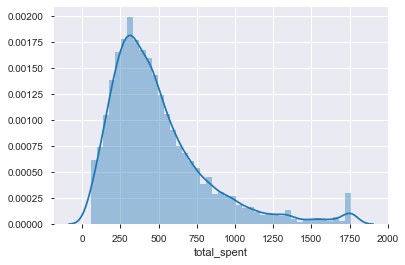

In [52]:
# For Linear regression y(totalspend) should follow normal istribution
import seaborn as sns
sns.distplot(data_final.total_spent)

**Now as you can see distribution is right skewed so we need to take log and then plot the graph.**

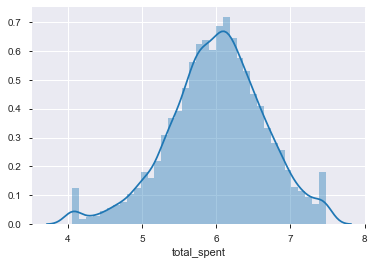

In [53]:
sns.distplot(np.log(data_final.total_spent)) # Taking Log transormation

In [54]:
#Creating New Y variable by taking log of total_spent
data_final['ln_total_spent']=np.log(data_final.total_spent)

In [55]:
data_final.head()

,age,ed,income,debtinc,lncreddebt,lnothdebt,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,address,carvalue,commutetime,longmon,lnlongmon,tollten,equipten,cardmon,cardten,wireten,hourstv,total_spent,region_2,region_3,region_4,region_5,gender_1,birthmonth_August,birthmonth_December,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,birthmonth_October,birthmonth_September,union_1,retire_1,default_1,marital_1,homeown_1,hometype_2,hometype_3,hometype_4,carown_0,carown_1,cartype_0,cartype_1,carbought_0,carbought_1,carbuy_1,commutecar_1,commutemotorcycle_1,commutecarpool_1,commutebus_1,commuterail_1,commutepublic_1,commutebike_1,commutewalk_1,commutenonmotor_1,telecommute_1,reason_2,reason_3,reason_4,reason_9,polview_2,polview_3,polview_4,polview_5,polview_6,polview_7,polparty_1,polcontrib_1,vote_1,card_2,card_3,card_4,card_5,cardfee_1,card2_2,card2_3,card2_4,card2_5,card2fee_1,active_1,bfast_2,bfast_3,churn_1,tollfree_1,equip_1,callcard_1,wireless_1,multline_1,voice_1,pager_1,internet_1,internet_2,internet_3,internet_4,callid_1,callwait_1,forward_1,confer_1,ebill_1,owntv_1,ownvcr_1,owndvd_1,owncd_1,ownpda_1,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1,townsize,jobcat,employ,empcat,inccat,jobsat,cars,carcatvalue,commute,card2tenure,cardtype,cardbenefit,card2type,card2benefit,ln_total_spent
0,20,15,31.0,11.1,0.183079,0.806516,3,0,0,0,0,0,0,0,0,0,14.3,22.0,6.50,1.871802,161.05,126.1,14.25,60.0,0.00,13,149.46,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,0,2,1,0,1,2,1,2,1,8,3,1,1,3,1,5.007029
1,22,17,15.0,18.6,0.200505,0.449788,2,6,0,0,0,0,0,0,6,2,6.8,29.0,8.90,2.186051,0.00,1975.0,16.00,610.0,1683.55,18,77.54,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,5,2,0,1,1,1,2,1,1,4,4,1,1,3,4.350794
2,67,14,35.0,9.9,-0.074056,0.930738,3,3,2,1,0,0,0,0,0,30,18.8,24.0,28.40,3.346389,0.00,0.0,23.00,1410.0,0.00,21,359.97,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,4,2,16,5,2,4,3,1,4,25,1,4,1,3,5.886021
3,23,16,20.0,5.7,-3.401690,0.110826,5,0,0,0,0,0,0,0,0,3,8.7,38.0,6.00,1.791759,0.00,0.0,21.00,685.0,0.00,26,359.41,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,0,3,2,0,1,1,2,3,1,1,5,1,4,2,4,5.884464
4,26,16,23.0,1.7,-1.538705,-1.735336,4,0,0,0,0,0,0,0,0,3,10.6,32.0,3.05,1.115142,387.70,0.0,17.25,360.0,410.80,27,507.83,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,1,0,1,1,1,1,0,1,1,1,1,0,1,0,1,0,0,0,1,0,2,2,1,1,1,1,1,1,6,9,2,1,3,2,6.230147


In [56]:
data_final.shape

(5000, 139)

**Finding the correlation among the X variables**

In [100]:
# Checking Co-relation of x-variables
corr_num=data_num.corr()
corr_num.to_csv('corrm_num.csv')

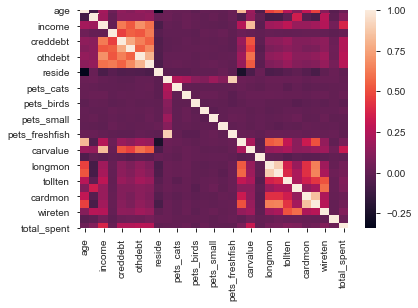

In [57]:
sns.heatmap(data_num.corr())

**From above it is clear that there is not very high correlation between Y and X variables**

## Data Preparation III (Feature Engineering – Feature Reduction)

**To check co-relation of Y & X(numerical features) and selecting the top 10 features which are highly correlated to Y variable**

In [58]:
column_names = pd.Series(list(data_num.corrwith(data_num.total_spent).index),name='Column_Names')
r_values =  pd.Series(list(data_num.corrwith(data_num.total_spent)),name='r_values')
corr = pd.concat([column_names,r_values],axis=1)
corr['r_values_abs'] = np.abs(corr.r_values)
corr = corr.sort_values(by=['r_values_abs'],ascending=False)

In [59]:
corr.head(10)

,Column_Names,r_values,r_values_abs
28,total_spent,1.000000,1.000000
2,income,0.377200,0.377200
...,...,...,...
26,wireten,0.100014,0.100014
22,tollten,0.099834,0.099834


In [60]:
corr.Column_Names.head(8)# Selecting top  features having co-relation greater than 0.2 

28    total_spent
2          income
         ...     
5      lncreddebt
1              ed
Name: Column_Names, Length: 8, dtype: object

In [61]:
data_final.head()

,age,ed,income,debtinc,lncreddebt,lnothdebt,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,address,carvalue,commutetime,longmon,lnlongmon,tollten,equipten,cardmon,cardten,wireten,hourstv,total_spent,region_2,region_3,region_4,region_5,gender_1,birthmonth_August,birthmonth_December,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,birthmonth_October,birthmonth_September,union_1,retire_1,default_1,marital_1,homeown_1,hometype_2,hometype_3,hometype_4,carown_0,carown_1,cartype_0,cartype_1,carbought_0,carbought_1,carbuy_1,commutecar_1,commutemotorcycle_1,commutecarpool_1,commutebus_1,commuterail_1,commutepublic_1,commutebike_1,commutewalk_1,commutenonmotor_1,telecommute_1,reason_2,reason_3,reason_4,reason_9,polview_2,polview_3,polview_4,polview_5,polview_6,polview_7,polparty_1,polcontrib_1,vote_1,card_2,card_3,card_4,card_5,cardfee_1,card2_2,card2_3,card2_4,card2_5,card2fee_1,active_1,bfast_2,bfast_3,churn_1,tollfree_1,equip_1,callcard_1,wireless_1,multline_1,voice_1,pager_1,internet_1,internet_2,internet_3,internet_4,callid_1,callwait_1,forward_1,confer_1,ebill_1,owntv_1,ownvcr_1,owndvd_1,owncd_1,ownpda_1,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1,townsize,jobcat,employ,empcat,inccat,jobsat,cars,carcatvalue,commute,card2tenure,cardtype,cardbenefit,card2type,card2benefit,ln_total_spent
0,20,15,31.0,11.1,0.183079,0.806516,3,0,0,0,0,0,0,0,0,0,14.3,22.0,6.50,1.871802,161.05,126.1,14.25,60.0,0.00,13,149.46,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,0,2,1,0,1,2,1,2,1,8,3,1,1,3,1,5.007029
1,22,17,15.0,18.6,0.200505,0.449788,2,6,0,0,0,0,0,0,6,2,6.8,29.0,8.90,2.186051,0.00,1975.0,16.00,610.0,1683.55,18,77.54,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,5,2,0,1,1,1,2,1,1,4,4,1,1,3,4.350794
2,67,14,35.0,9.9,-0.074056,0.930738,3,3,2,1,0,0,0,0,0,30,18.8,24.0,28.40,3.346389,0.00,0.0,23.00,1410.0,0.00,21,359.97,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,4,2,16,5,2,4,3,1,4,25,1,4,1,3,5.886021
3,23,16,20.0,5.7,-3.401690,0.110826,5,0,0,0,0,0,0,0,0,3,8.7,38.0,6.00,1.791759,0.00,0.0,21.00,685.0,0.00,26,359.41,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,0,3,2,0,1,1,2,3,1,1,5,1,4,2,4,5.884464
4,26,16,23.0,1.7,-1.538705,-1.735336,4,0,0,0,0,0,0,0,0,3,10.6,32.0,3.05,1.115142,387.70,0.0,17.25,360.0,410.80,27,507.83,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,1,0,1,1,1,1,0,1,1,1,1,0,1,0,1,0,0,0,1,0,2,2,1,1,1,1,1,1,6,9,2,1,3,2,6.230147


**Variable Reduction**

In [62]:
# Separating features(X-variables) & Y(dependent) variable into 2 separate dataframe
features = data_final[data_final.columns.difference( ['ln_total_spent', 'total_spent'] )]
target = data_final['ln_total_spent']

In [63]:
features.isnull().any().value_counts()

False    137
dtype: int64

In [64]:
target.head()

0    5.007029
1    4.350794
2    5.886021
3    5.884464
4    6.230147
Name: ln_total_spent, dtype: float64

## Variable Reduction

### Recursive Feature Elimination

In [65]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

#import itertools

#Checking RFE 

lm = LinearRegression()
#create the RFE model and select 30 attributes
rfe = RFE(lm, n_features_to_select=10)
rfe = rfe.fit(features, target)

In [66]:
RFE_features=features.columns[rfe.get_support()]
features1 = features[RFE_features]

In [67]:
RFE_imp_vars = list(features.columns[rfe.support_])

In [68]:
RFE_imp_vars

['carbought_0',
 'carbought_1',
 'card_2',
 'card_3',
 'card_4',
 'card_5',
 'carown_0',
 'carown_1',
 'cartype_0',
 'cartype_1']

### F Regression (Univariate Regression)

In [69]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(features, target )

In [70]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [71]:
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results = f_reg_results.sort_values(by=['P_Value']).head(10)

In [72]:
f_reg_imp_vars=list(f_reg_results.Variable)

In [73]:
f_reg_imp_vars

['gender_1',
 'carvalue',
 'confer_1',
 'ed',
 'empcat',
 'employ',
 'equip_1',
 'equipten',
 'forward_1',
 'wireless_1']

### Select K Best

In [74]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

In [75]:
selector = SelectKBest(f_classif, k=10)

In [76]:
selector.fit(features, target)

SelectKBest(k=10, score_func=<function f_classif at 0x000001B42DFB94C8>)

In [77]:
K_Best=features.columns[selector.get_support()]

In [78]:
K_best_imp_vars=list(K_Best)

In [79]:
K_best_imp_vars

['birthmonth_August',
 'birthmonth_May',
 'card2_5',
 'card_5',
 'default_1',
 'ed',
 'inccat',
 'pets_saltfish',
 'reason_2',
 'response_03_1']

### Variance Inflation Factor(VIF)

In [80]:
features2 = features.astype('float64')

In [81]:
VIF = [variance_inflation_factor(features2.values,i) for i in range(features2.shape[1])]
VIF_results = pd.concat([pd.Series(features2.columns), pd.Series(VIF)],axis=1)
VIF_results.columns = ['Feature','VIF']
VIF_results = VIF_results.sort_values('VIF',ascending=False)
VIF_results2 = VIF_results.sort_values('VIF',ascending=True)
VIF_results2.Feature.head(10)

52     commutemotorcycle_1
54         commutepublic_1
              ...         
132                union_1
48           commutebike_1
Name: Feature, Length: 10, dtype: object

In [82]:
Selected_vars={
'income',
'lnothdebt',
'lncreddebt',
'card2_2',
'card2_3',
'card2_4',
'card2_5',
'card_2',
'card_3',
'card_4',
'card_5',
'reason_2',
'inccat',
'carvalue',
'lnothdebt',
'lncreddebt',
'carcatvalue',
'retire_1',
'birthmonth_May',
'card2_5',
'card_5',
'default_1',
'inccat',
'pets_saltfish',
'reason_2',
'response_03_1',
'response_01_1',
'reason_3',
'commutemotorcycle_1',
'response_03_1',
'hometype_4',
'commutepublic_1',
'response_02_1',
'commutenonmotor_1',
'union_1',
'commutebike_1',
}

In [83]:
Selected_vars = list(Selected_vars)
len(Selected_vars)

29

## Data Preparation Level IV (Resampling data)

In [84]:
#### Preparing final data
All_Variables = Selected_vars + ['ln_total_spent']
final_data = data_final.loc[:,All_Variables]


In [85]:
final_data.shape

(5000, 30)

In [86]:
final_data.head()

,response_02_1,lncreddebt,hometype_4,card_2,card_4,commutepublic_1,response_01_1,commutenonmotor_1,inccat,default_1,response_03_1,card2_2,reason_3,birthmonth_May,income,card2_5,card2_4,pets_saltfish,lnothdebt,card_3,reason_2,carcatvalue,carvalue,union_1,commutebike_1,card2_3,card_5,retire_1,commutemotorcycle_1,ln_total_spent
0,1,0.183079,0,0,0,0,0,0,2,1,0,0,0,0,31.0,1,0,0,0.806516,1,0,1,14.3,1,0,0,0,0,1,5.007029
1,0,0.200505,0,1,0,0,0,1,1,1,0,0,0,1,15.0,0,1,0,0.449788,0,0,1,6.8,0,1,0,0,0,0,4.350794
2,0,-0.074056,0,1,0,0,0,0,2,0,0,0,0,0,35.0,0,1,0,0.930738,0,1,1,18.8,0,0,0,0,0,0,5.886021
3,0,-3.401690,0,1,0,0,1,0,1,1,0,0,0,1,20.0,0,0,0,0.110826,0,0,1,8.7,0,0,1,0,0,0,5.884464
4,1,-1.538705,0,0,1,1,0,0,1,0,0,0,0,0,23.0,0,0,0,-1.735336,0,0,1,10.6,0,0,0,0,0,0,6.230147


**Train And Test data**

In [87]:
#Splitting data into training and testing data sets
train_reg, test_reg = train_test_split(final_data, test_size = 0.3,random_state = 1234 )

In [88]:
Selected_vars

['response_02_1',
 'lncreddebt',
 'hometype_4',
 'card_2',
 'card_4',
 'commutepublic_1',
 'response_01_1',
 'commutenonmotor_1',
 'inccat',
 'default_1',
 'response_03_1',
 'card2_2',
 'reason_3',
 'birthmonth_May',
 'income',
 'card2_5',
 'card2_4',
 'pets_saltfish',
 'lnothdebt',
 'card_3',
 'reason_2',
 'carcatvalue',
 'carvalue',
 'union_1',
 'commutebike_1',
 'card2_3',
 'card_5',
 'retire_1',
 'commutemotorcycle_1']

## Model Implementation

In [89]:
my_formula='ln_total_spent~reason_2+carvalue+lnothdebt+card_5+response_02_1+lncreddebt+response_01_1+card2_3+default_1+inccat+carcatvalue+commutebike_1+card_4+birthmonth_May+response_03_1+card2_4+card2_5+union_1+commutemotorcycle_1+retire_1+card_2+commutenonmotor_1+pets_saltfish+reason_3+card2_2+hometype_4+commutepublic_1+card_3+income'

In [90]:
model1_train = sm.ols(my_formula, data=train_reg).fit()
print(model1_train.summary2())

                  Results: Ordinary least squares
Model:                OLS              Adj. R-squared:     0.332    
Dependent Variable:   ln_total_spent   AIC:                5541.4764
Date:                 2020-01-06 12:08 BIC:                5757.0946
No. Observations:     3500             Log-Likelihood:     -2735.7  
Df Model:             34               F-statistic:        52.07    
Df Residuals:         3465             Prob (F-statistic): 2.87e-280
R-squared:            0.338            Scale:              0.28237  
--------------------------------------------------------------------
                     Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------
Intercept            6.5244   0.0573 113.8054 0.0000  6.4120  6.6368
inccat[T.2]          0.1392   0.0293   4.7531 0.0000  0.0818  0.1966
inccat[T.3]          0.2864   0.0468   6.1151 0.0000  0.1946  0.3783
inccat[T.4]          0.2522   0.0637   3.9603 0.0001 

### Nelglecting the features which have p values > 0.05

In [91]:
my_formula2='ln_total_spent~reason_2+card_5+card2_3+inccat+card_4+card2_4+card2_5+retire_1+card_2+card2_2+card_3+income'

In [92]:
model = sm.ols(my_formula2, data=train_reg).fit()
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.332    
Dependent Variable: ln_total_spent   AIC:                5521.4836
Date:               2020-01-06 12:08 BIC:                5620.0519
No. Observations:   3500             Log-Likelihood:     -2744.7  
Df Model:           15               F-statistic:        116.9    
Df Residuals:       3484             Prob (F-statistic): 2.27e-294
R-squared:          0.335            Scale:              0.28228  
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      6.5154    0.0413  157.7137  0.0000   6.4344   6.5964
inccat[T.2]    0.1374    0.0269    5.1159  0.0000   0.0847   0.1901
inccat[T.3]    0.2799    0.0392    7.1409  0.0000   0.2030   0.3567
inccat[T.4]    0.2676    0.0549    4.8757  0.0000   0.1600   0.3752
inccat

## POST MODELING
## Model Validation
## Predicting the Y on the train and test dataset

In [93]:
#Transforming log values into actual values in both training and testing data sets
train_reg['pred'] = pd.DataFrame(np.exp(model.predict(train_reg)))

test_reg['pred'] = pd.DataFrame(np.exp(model.predict(test_reg)))

 # Including the Y(dependent) Variable to compare

train_reg['Total_spent'] = np.exp(train_reg.ln_total_spent)


test_reg['Total_spent'] = np.exp(test_reg.ln_total_spent)

**Checking Metrics for both training and testing data sets**

In [94]:
print("MAPE for Training and testing data sets:")
MAPE_train = np.mean(np.abs(train_reg.Total_spent - train_reg.pred)/train_reg.Total_spent)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_reg.Total_spent - test_reg.pred)/test_reg.Total_spent)
print(MAPE_test)

#MSE for training and testing data sets 
print("\nMSE for Training and testing data sets:")
print(metrics.mean_squared_error(train_reg.Total_spent,train_reg.pred)) 
print(metrics.mean_squared_error(test_reg.Total_spent,test_reg.pred))

#RMSE for training and testing data sets
print("\nRMSE for Training and testing data sets:")
print(np.sqrt(metrics.mean_squared_error(train_reg.Total_spent,train_reg.pred)))
print(np.sqrt(metrics.mean_squared_error(test_reg.Total_spent,test_reg.pred)))

MAPE for Training and testing data sets:
0.47830800771467386
0.47329494944787665

MSE for Training and testing data sets:
74266.17835641894
68248.1340783699

RMSE for Training and testing data sets:
272.51821655885493
261.24343834509966


**Analysis of Residuals**

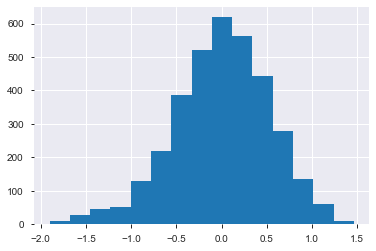

In [95]:
#Checking Errors distribution
model.resid.hist(bins=15)
model.resid.to_csv("Residual.csv")
# Residuals following Normal distribution. This is one of the Assumption in Linear Regression.

**Decile Analysis**

***Decile analysis for validation of models - Business validation***

In [96]:
train_reg['Deciles']=pd.qcut(train_reg['pred'],10, labels=False)
test_reg['Deciles']=pd.qcut(test_reg['pred'],10, labels=False)

In [97]:
# Decile Analysis for train data
Predicted_avg = train_reg[['Deciles','pred']].groupby(train_reg.Deciles).mean().sort_index(ascending=False)['pred']
Actual_avg = train_reg[['Deciles','Total_spent']].groupby(train_reg.Deciles).mean().sort_index(ascending=False)['Total_spent']

Decile_analysis_train = pd.concat([Predicted_avg, Actual_avg], axis=1)

Decile_analysis_train

,pred,Total_spent
Deciles,,
9,850.741624,929.421101
8,619.000897,684.566334
...,...,...
1,274.669522,322.181668
0,236.694057,275.245268


In [98]:
# Decile Analysis for test data
Predicted_avg = test_reg[['Deciles','pred']].groupby(test_reg.Deciles).mean().sort_index(ascending=False)['pred']
Actual_avg = test_reg[['Deciles','Total_spent']].groupby(test_reg.Deciles).mean().sort_index(ascending=False)['Total_spent']

Decile_analysis_test = pd.concat([Predicted_avg, Actual_avg], axis=1)

Decile_analysis_test

,pred,Total_spent
Deciles,,
9,813.482305,864.563213
8,611.748340,685.052765
...,...,...
1,280.238809,345.165933
0,239.228627,261.886837


In [173]:
#Exporting Decile analysis in csv formate
Decile_analysis_train.to_csv('Decile_analysis_train.csv')
Decile_analysis_test.to_csv('Decile_analysis_test.csv')

# Machine learning

In [99]:
data_final.shape

(5000, 139)

In [100]:
data_final.head()

,age,ed,income,debtinc,lncreddebt,lnothdebt,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,address,carvalue,commutetime,longmon,lnlongmon,tollten,equipten,cardmon,cardten,wireten,hourstv,total_spent,region_2,region_3,region_4,region_5,gender_1,birthmonth_August,birthmonth_December,birthmonth_February,birthmonth_January,birthmonth_July,birthmonth_June,birthmonth_March,birthmonth_May,birthmonth_November,birthmonth_October,birthmonth_September,union_1,retire_1,default_1,marital_1,homeown_1,hometype_2,hometype_3,hometype_4,carown_0,carown_1,cartype_0,cartype_1,carbought_0,carbought_1,carbuy_1,commutecar_1,commutemotorcycle_1,commutecarpool_1,commutebus_1,commuterail_1,commutepublic_1,commutebike_1,commutewalk_1,commutenonmotor_1,telecommute_1,reason_2,reason_3,reason_4,reason_9,polview_2,polview_3,polview_4,polview_5,polview_6,polview_7,polparty_1,polcontrib_1,vote_1,card_2,card_3,card_4,card_5,cardfee_1,card2_2,card2_3,card2_4,card2_5,card2fee_1,active_1,bfast_2,bfast_3,churn_1,tollfree_1,equip_1,callcard_1,wireless_1,multline_1,voice_1,pager_1,internet_1,internet_2,internet_3,internet_4,callid_1,callwait_1,forward_1,confer_1,ebill_1,owntv_1,ownvcr_1,owndvd_1,owncd_1,ownpda_1,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1,townsize,jobcat,employ,empcat,inccat,jobsat,cars,carcatvalue,commute,card2tenure,cardtype,cardbenefit,card2type,card2benefit,ln_total_spent
0,20,15,31.0,11.1,0.183079,0.806516,3,0,0,0,0,0,0,0,0,0,14.3,22.0,6.50,1.871802,161.05,126.1,14.25,60.0,0.00,13,149.46,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,0,2,1,0,1,2,1,2,1,8,3,1,1,3,1,5.007029
1,22,17,15.0,18.6,0.200505,0.449788,2,6,0,0,0,0,0,0,6,2,6.8,29.0,8.90,2.186051,0.00,1975.0,16.00,610.0,1683.55,18,77.54,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,5,2,0,1,1,1,2,1,1,4,4,1,1,3,4.350794
2,67,14,35.0,9.9,-0.074056,0.930738,3,3,2,1,0,0,0,0,0,30,18.8,24.0,28.40,3.346389,0.00,0.0,23.00,1410.0,0.00,21,359.97,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,4,2,16,5,2,4,3,1,4,25,1,4,1,3,5.886021
3,23,16,20.0,5.7,-3.401690,0.110826,5,0,0,0,0,0,0,0,0,3,8.7,38.0,6.00,1.791759,0.00,0.0,21.00,685.0,0.00,26,359.41,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,0,3,2,0,1,1,2,3,1,1,5,1,4,2,4,5.884464
4,26,16,23.0,1.7,-1.538705,-1.735336,4,0,0,0,0,0,0,0,0,3,10.6,32.0,3.05,1.115142,387.70,0.0,17.25,360.0,410.80,27,507.83,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,1,0,1,1,1,1,0,1,1,1,1,0,1,0,1,0,0,0,1,0,2,2,1,1,1,1,1,1,6,9,2,1,3,2,6.230147


In [101]:
#Independent columns
Ind_cols = data_final.columns.difference(['total_spent','ln_total_spent'])

In [102]:
#Considering Significant Variables for Machine Learning algorithms
train_x, test_x, train_y, test_y = train_test_split(data_final[Ind_cols],data_final.total_spent, test_size=0.3, random_state=1234)

## Ridge And Lasso

In [103]:
# Importing Required Packages
from sklearn.linear_model import Ridge,Lasso

In [104]:
# Ridge Regression

In [105]:
Ridge_Reg = Ridge(alpha=0.0001,normalize=True)
Ridge_Reg.fit(train_x,train_y)

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [106]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y -Ridge_Reg.predict(train_x))/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- Ridge_Reg.predict(test_x))/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,Ridge_Reg.predict(train_x)))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,Ridge_Reg.predict(test_x)))
print(RMSE_test)

MAPE values for training and testing data :
0.5447797391470673
0.5604077115357133

RMSE values for training and testing data :
260.7811956059679
260.45148443802753


In [192]:
# Lasso Regression 

In [107]:
Lasso_Reg = Lasso(alpha=0.0001,normalize=True)
Lasso_Reg.fit(train_x,train_y)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [108]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y -Lasso_Reg.predict(train_x))/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- Lasso_Reg.predict(test_x))/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,Lasso_Reg.predict(train_x)))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,Lasso_Reg.predict(test_x)))
print(RMSE_test)

MAPE values for training and testing data :
0.5447701304989081
0.5603540070728856

RMSE values for training and testing data :
260.78127946048704
260.4388948946175


## 1.Decision Trees 

In [109]:
#Importing packages
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor, export_graphviz, export
from sklearn.model_selection import GridSearchCV

In [110]:
#Model building
param_grid = {'max_depth': np.arange(2, 5),
             'max_features': np.arange(4,7)}
reg_tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 3)
reg_tree.fit(train_x,train_y)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([2, 3, 4]),
                         'max_features': array([4, 5, 6])},
             pre_dispatch='2*n_jobs', r

In [111]:
reg_tree.best_params_

{'max_depth': 4, 'max_features': 6}

**Building final descision  tree model on best parameters**

In [113]:
reg_tree = DecisionTreeRegressor( max_depth = 3, max_features=6 )
reg_tree.fit( train_x, train_y )

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [114]:
#Predicting values for both training and testing data sets
tree_train_pred= reg_tree.predict(train_x)
tree_test_pred=reg_tree.predict(test_x)

In [115]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y -tree_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- tree_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,tree_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,tree_test_pred))
print(RMSE_test)

MAPE values for training and testing data :
0.681161743154417
0.6887723849993043

RMSE values for training and testing data :
304.37279742894054
295.0694109691741


In [119]:
importances = reg_tree.feature_importances_

In [124]:
print(dict(zip(train_x.columns,importances)))

{'active_1': 0.0, 'address': 0.0, 'age': 0.0, 'bfast_2': 0.0, 'bfast_3': 0.0, 'birthmonth_August': 0.0, 'birthmonth_December': 0.0, 'birthmonth_February': 0.0, 'birthmonth_January': 0.0, 'birthmonth_July': 0.0, 'birthmonth_June': 0.0, 'birthmonth_March': 0.0, 'birthmonth_May': 0.0, 'birthmonth_November': 0.0, 'birthmonth_October': 0.0, 'birthmonth_September': 0.0, 'callcard_1': 0.0, 'callid_1': 0.0, 'callwait_1': 0.0, 'carbought_0': 0.0, 'carbought_1': 0.0, 'carbuy_1': 0.0, 'carcatvalue': 0.0, 'card2_2': 0.0, 'card2_3': 0.0, 'card2_4': 0.0, 'card2_5': 0.0, 'card2benefit': 0.0, 'card2fee_1': 0.017892257625254735, 'card2tenure': 0.0, 'card2type': 0.0, 'card_2': 0.0, 'card_3': 0.0, 'card_4': 0.0, 'card_5': 0.0, 'cardbenefit': 0.0, 'cardfee_1': 0.0, 'cardmon': 0.0, 'cardten': 0.0, 'cardtype': 0.0, 'carown_0': 0.025655425118549575, 'carown_1': 0.0, 'cars': 0.0, 'cartype_0': 0.0, 'cartype_1': 0.0, 'carvalue': 0.0, 'churn_1': 0.0, 'commute': 0.0, 'commutebike_1': 0.00453476064842559, 'commute

## 2.Ensemble Learning
### Random Forest

In [125]:
#Importing required packages
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [126]:
pargrid_ada = {'n_estimators': [50,60,70,80,100],
               'max_depth':[2,3,4]}

rf = GridSearchCV(estimator=RandomForestRegressor(), 
                        param_grid=pargrid_ada, 
                        cv=3,n_jobs=-1)
rf.fit(train_x,train_y)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [144]:
rf.best_params_

{'max_depth': 4, 'n_estimators': 70}

**Building random forest on best parameters**

In [145]:
rf = RandomForestRegressor(max_depth=4,n_estimators=70)
rf.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=70, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [146]:
#Predicting values for both training and testing data sets
rf_train_pred=rf.predict(train_x)
rf_test_pred=rf.predict(test_x)

In [147]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - rf_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- rf_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,rf_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,rf_test_pred))
print(RMSE_test)

MAPE values for training and testing data :
0.6231137127911259
0.648914872347844

RMSE values for training and testing data :
281.6956412300488
280.89347481174354


# XGBOOST

In [129]:
#Importing Required packages
import xgboost
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBRegressor

In [130]:
train_x_new=train_x.astype('int')
train_y_new=train_y.astype('int')
test_x_new=test_x.astype('int')
test_y_new=test_y.astype('int')

In [131]:
para_grid_xg = {'n_estimators': [60,70,80,100,120],
               'max_depth':[2,3,4,5]}

gscv_xg = GridSearchCV(estimator=xgboost.XGBRegressor(), 
                        param_grid=para_grid_xg, 
                        cv=3,n_jobs=-1)

xg_boost=gscv_xg.fit(train_x_new, train_y_new)

[12:45:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [132]:
xg_boost.best_params_

{'max_depth': 2, 'n_estimators': 120}

**Building XGBOOST on best parameters**

In [133]:
from xgboost import plot_importance

In [134]:
selection_model = xgboost.XGBRegressor(n_estimators=120,max_depth=2)

In [135]:
selection_model.fit(train_x_new, train_y_new)

[12:46:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=120,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

**Plotting the feature importances**

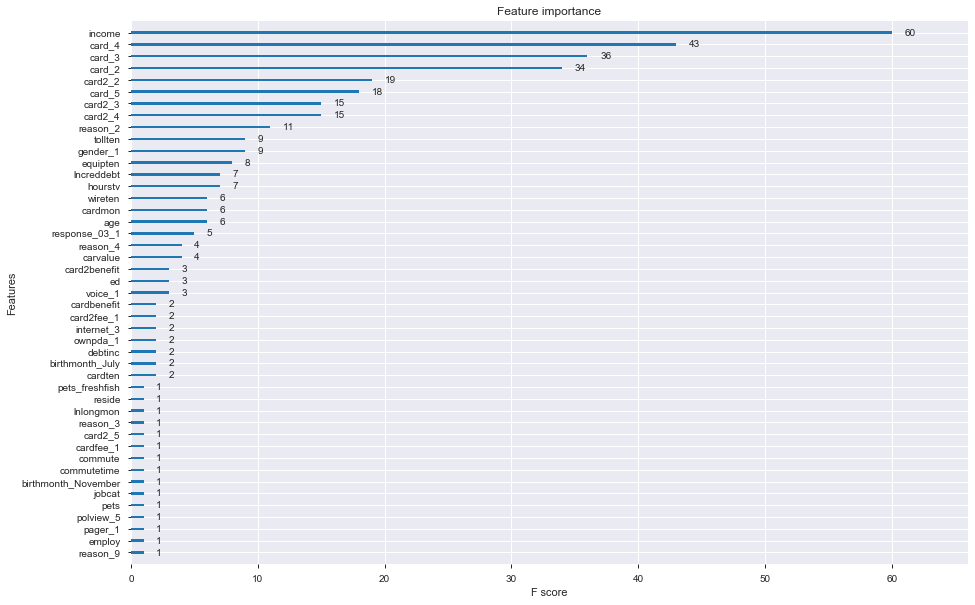

In [149]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
plot_importance(selection_model)
plt.savefig("figure.png")
plt.show()


In [137]:
#Predicting values for both training and testing data sets
xg_train_pred=selection_model.predict(train_x_new)
xg_test_pred=selection_model.predict(test_x_new)

In [138]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y_new - xg_train_pred)/train_y_new)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y_new- xg_test_pred)/test_y_new)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y_new,xg_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y_new,xg_test_pred))
print(RMSE_test)

MAPE values for training and testing data :
0.5683892003938467
0.5901718806391508

RMSE values for training and testing data :
262.4973417051681
261.51365185901346


**Saving XGBOOST Model as a pickle object**

In [ ]:
#Lets save everything in selection_model to pickle object
import pickle

In [ ]:
# now you can save it to a file
with open('selection_model.pkl', 'wb') as f:
    pickle.dump(selection_model, f)

In [ ]:
# and later you can load it
with open('selection_model.pkl', 'rb') as f:
    selection_model = pickle.load(f)

## SVM(Support Vector Machine)


In [150]:
#Importing required modules
from sklearn.svm import SVR
from sklearn.svm import LinearSVR 

In [ ]:
#Model building using Linear svm 
tuned_parameters = [{'C': [1,0.1,0.001,10,100],
                    'gamma':[0.0001, 0.001, 0.01, 0.1],
                    'kernel':['linear','rbf','poly']}]

svr_reg = GridSearchCV(SVR(),
                   tuned_parameters,
                   cv=3)

svr = svr_reg.fit(train_x,train_y)

In [ ]:
#Predicting values for both training and testing data sets
L_svr_train_pred=svr.predict(train_x)
L_svr_test_pred=svr.predict(test_x)

In [ ]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - L_svr_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- L_svr_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,L_svr_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,L_svr_test_pred))
print(RMSE_test)

## K - Nearest Neighbours

In [ ]:
#Importing required modules
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
#Standardizing the data because KNN is distance based algorithm 
scaler = StandardScaler()
train_X = scaler.fit_transform(train_x)
test_X = scaler.fit_transform(test_x)

In [ ]:
Model Building using different tuning parameters
tuned_parameters = [{'n_neighbors': [3,5, 7, 9,11],
                    'leaf_size':[20,30,40,50,60]}]

knn_reg = GridSearchCV(KNeighborsRegressor(),
                   tuned_parameters,
                   cv=3)

data_knn = knn_reg.fit(train_X,train_y)

In [ ]:
#Predicting values for both training and testing data sets
knn_train_pred=data_knn.predict(train_X)
knn_test_pred=data_knn.predict(test_X)

In [ ]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
print("MAPE values for training and testing data :")
MAPE_train = np.mean(np.abs(train_y - knn_train_pred)/train_y)
print(MAPE_train)
MAPE_test = np.mean(np.abs(test_y- knn_test_pred)/test_y)
print(MAPE_test)

#Root Mean Squared error
print("\nRMSE values for training and testing data :")
RMSE_test = np.sqrt(mean_squared_error(train_y,knn_train_pred))
print(RMSE_test)
RMSE_test =np.sqrt(mean_squared_error(test_y,knn_test_pred))
print(RMSE_test)